## 間違った結果と方法
ここで、pythonのsklearnのパッケージの使い方を学ぶために線形回帰のモデルを作ってみる。
だが、データは線形的ではないので、このモデルを使うのは間違っているのがわかっている。
データセットはKaggleで見える。

In [94]:
# 必要なパッケージを読みこむ
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
games = pd.read_csv('Video_Game_Sales_Clean.csv')

In [96]:
games.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


まずは、Critic_Scoreを説明変数として、Global_Salesを目的変数として、単回帰のモデルを作る。

In [97]:
sns.set_style("whitegrid")

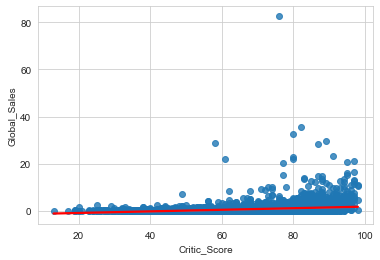

In [98]:
sns.regplot('Critic_Score', 'Global_Sales', fit_reg = True, data = games, line_kws = {'color': 'red'})

これはそんなにいい可視化ではない。どうしてかというと、線形的な関係は透明的に見られない。だが、pythonのモジュルの使い方を学ぶために進もう。

numpyでは、この方程式が必要だ。

y = Ap. 

In [105]:
X = games.Critic_Score

In [106]:
X = np.vstack(X)

In [107]:
X.shape

(6825, 1)

In [108]:
Y = games.Global_Sales

In [109]:
Y = np.vstack(Y)

In [110]:
Y.shape
#X = np.array([[value,float(1)] for value in X ]) 
#X = X.astype(np.float64) #役に立たなかった

(6825, 1)

In [111]:
from sklearn.preprocessing import add_dummy_feature

In [112]:
X = games.Critic_Score
X = np.vstack(X)
X = add_dummy_feature(X)

Y = games.Global_Sales
Y = np.vstack(Y)

In [113]:
result = np.linalg.lstsq(X, Y, rcond=None)

In [114]:
a, b = np.linalg.lstsq(X, Y, rcond=None)[0]

In [115]:
a, b

(array([-1.58579729]), array([0.03363195]))

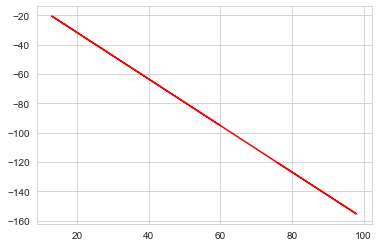

In [116]:
plt.plot(games.Critic_Score, a * games.Critic_Score + b, 'r')

何か問題がある。これは前の直線じゃないので。

In [117]:
rss = result[1]

In [118]:
mse = rss / len(X)

In [119]:
rmse = np.sqrt(mse)

In [120]:
rmse

array([1.90709738])

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lreg = LinearRegression()

In [123]:
X_multi = games[['Critic_Score', 'User_Score']]

In [124]:
Y = games['Global_Sales']

In [125]:
lreg.fit(X_multi, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
coeff_df = pd.DataFrame(["Critic_Score", "User_Score"])

In [127]:
coeff_df.columns = ['Features']

In [128]:
coeff_df['Coefficient_Estimate'] = pd.Series(lreg.coef_)

In [129]:
coeff_df

,Features,Coefficient_Estimate
0,Critic_Score,0.039765
1,User_Score,-0.101788


In [130]:
from sklearn.model_selection import train_test_split 

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X_multi, Y)

In [132]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(5118, 2) (5118,) (1707, 2) (1707,)


In [133]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [135]:
train_mse = np.mean( ( Y_train - pred_train ) ** 2 )
test_mse = np.mean( ( Y_test - pred_test ) ** 2 )

In [136]:
print(train_mse, test_mse)

4.034925005624712 2.3896605997535647


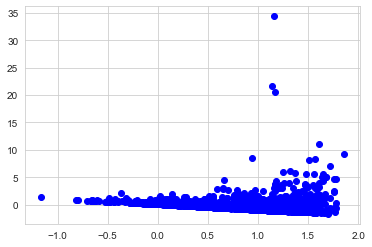

In [137]:
test_plot = plt.scatter(pred_test, ( Y_test - pred_test ), color = 'b')